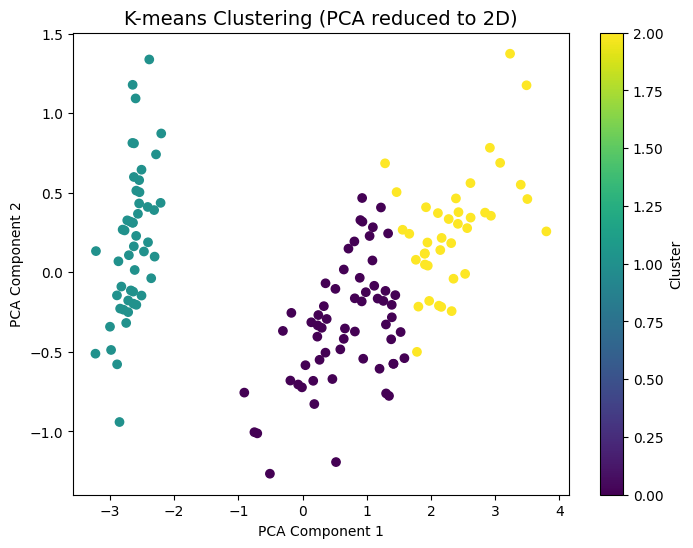

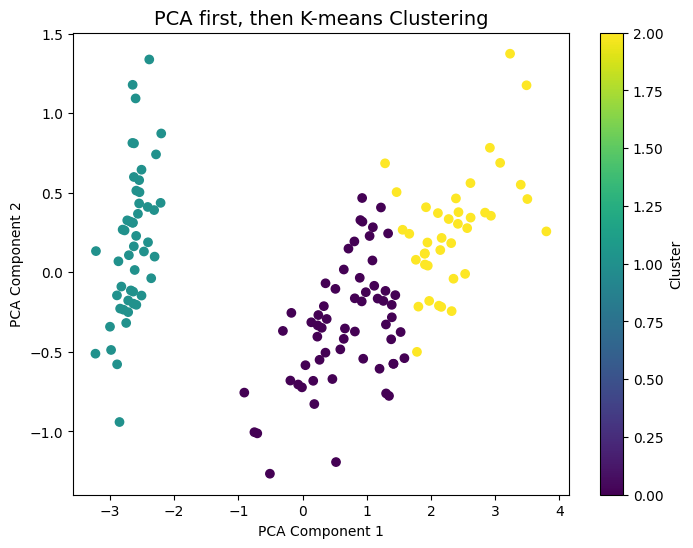

轮廓系数（原始数据）：0.5512
轮廓系数（PCA降维后数据）：0.5977


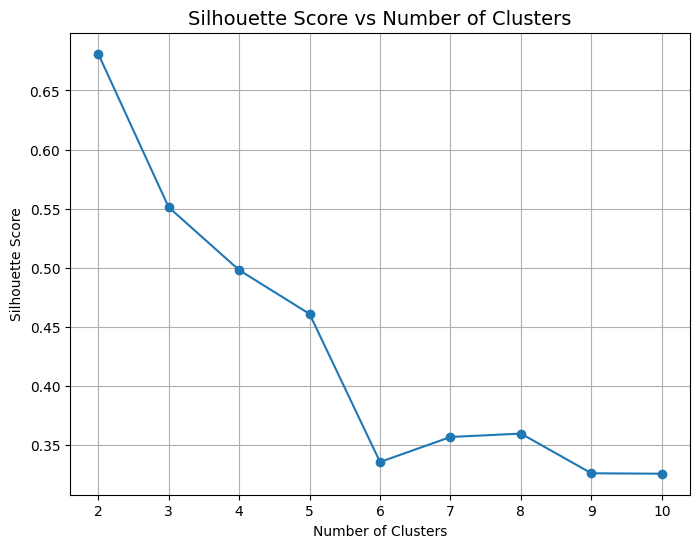

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


iris = load_iris()
X = iris.data

kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-means Clustering (PCA reduced to 2D)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

X_pca_for_clustering = PCA(n_components=2).fit_transform(X)
kmeans_pca = KMeans(n_clusters=3, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca_for_clustering)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_for_clustering[:, 0], X_pca_for_clustering[:, 1], c=y_kmeans_pca, cmap='viridis')
plt.title('PCA first, then K-means Clustering', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

silhouette_score_original = silhouette_score(X, y_kmeans)
silhouette_score_pca = silhouette_score(X_pca_for_clustering, y_kmeans_pca)

print(f"轮廓系数（原始数据）：{silhouette_score_original:.4f}")
print(f"轮廓系数（PCA降维后数据）：{silhouette_score_pca:.4f}")

range_n_clusters = range(2, 11)
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans_temp = KMeans(n_clusters=n_clusters, random_state=0)
    y_kmeans_temp = kmeans_temp.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, y_kmeans_temp))

plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
